<a href="https://colab.research.google.com/github/trivedidharmik/cs3735/blob/main/Trivedi_Dharmik_Asmt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

# Load MNIST data from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use a subset of the training data for faster experiments
subset_size = 10000
x_train = x_train[:subset_size]
y_train = y_train[:subset_size]

# Reshape to add a channel dimension and normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels for 10 classes (digits 0-9)
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)


In [ ]:
# 10 different experiment configurations with variations in architecture and hyperparameters.
experiments = [
    {
        'name': 'Exp 1',
        'conv_layers': 2,
        'filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'adam'
    },
    {
        'name': 'Exp 2',
        'conv_layers': 2,
        'filters': [16, 32],
        'kernel_sizes': [(5, 5), (5, 5)],
        'dense_units': 64,
        'dropout': [0.2, 0.4],
        'batch_size': 64,
        'epochs': 3,
        'optimizer': 'rmsprop'
    },
    {
        'name': 'Exp 3',
        'conv_layers': 3,
        'filters': [32, 64, 128],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'adam'
    },
    {
        'name': 'Exp 4',
        'conv_layers': 2,
        'filters': [64, 128],
        'kernel_sizes': [(3, 3), (3, 3)],
        'dense_units': 256,
        'dropout': [0.3, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'sgd'
    },
    {
        'name': 'Exp 5',
        'conv_layers': 1,
        'filters': [32],
        'kernel_sizes': [(3, 3)],
        'dense_units': 128,
        'dropout': [0.5],
        'batch_size': 256,
        'epochs': 3,
        'optimizer': 'adam'
    },
    {
        'name': 'Exp 6',
        'conv_layers': 2,
        'filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'adam'
    },
    {
        'name': 'Exp 7',
        'conv_layers': 2,
        'filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'sgd'
    },
    {
        'name': 'Exp 8',
        'conv_layers': 2,
        'filters': [32, 64],
        'kernel_sizes': [(5, 5), (5, 5)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'adam'
    },
    {
        'name': 'Exp 9',
        'conv_layers': 3,
        'filters': [32, 64, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'dense_units': 128,
        'dropout': [0.25, 0.5],
        'batch_size': 128,
        'epochs': 3,
        'optimizer': 'sgd'
    },
    {
        'name': 'Exp 10',
        'conv_layers': 2,
        'filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'dense_units': 64,
        'dropout': [0.2, 0.4],
        'batch_size': 64,
        'epochs': 3,
        'optimizer': 'rmsprop'
    }
]


In [ ]:
def build_model(config):
    model = Sequential()
    input_shape = (28, 28, 1)

    # First convolutional layer with the input shape
    model.add(Conv2D(config['filters'][0],
                     kernel_size=config['kernel_sizes'][0],
                     activation='relu',
                     input_shape=input_shape))

    # Add additional convolutional layers if specified
    for i in range(1, config['conv_layers']):
        model.add(Conv2D(config['filters'][i],
                         kernel_size=config['kernel_sizes'][i],
                         activation='relu'))

    # Add a max pooling layer after the last conv layer
    if config['conv_layers'] > 0:
        model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add dropout after pooling if provided (use the first dropout value)
    if len(config['dropout']) >= 1:
        model.add(Dropout(config['dropout'][0]))

    model.add(Flatten())
    model.add(Dense(config['dense_units'], activation='relu'))

    # Optionally add a second dropout layer after the dense layer
    if len(config['dropout']) >= 2:
        model.add(Dropout(config['dropout'][1]))

    model.add(Dense(10, activation='softmax'))

    # Compile the model with categorical crossentropy loss and the specified optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer=config['optimizer'],
                  metrics=['accuracy'])
    return model


In [ ]:
results = []  # To store test loss and accuracy for each experiment

# Early stopping callback: stops training if validation loss does not improve for 1 epoch.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

for exp in experiments:
    print(f"Running {exp['name']} ...")
    model = build_model(exp)

    # Train the model using 10% of the training data for validation.
    history = model.fit(x_train, y_train,
                        batch_size=exp['batch_size'],
                        epochs=exp['epochs'],
                        validation_split=0.1,
                        callbacks=[early_stop],
                        verbose=0)  # Change verbose to 1 if you want more output

    # Evaluate the model on the full test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    results.append({'Experiment': exp['name'],
                    'Test Loss': test_loss,
                    'Test Accuracy': test_accuracy})
    print(f"{exp['name']} - Test Accuracy: {test_accuracy:.4f}")


Running Exp 1 ...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Exp 1 - Test Accuracy: 0.9713
Running Exp 2 ...
Exp 2 - Test Accuracy: 0.9683
Running Exp 3 ...
Exp 3 - Test Accuracy: 0.9745
Running Exp 4 ...
Exp 4 - Test Accuracy: 0.8763
Running Exp 5 ...
Exp 5 - Test Accuracy: 0.9413
Running Exp 6 ...
Exp 6 - Test Accuracy: 0.9715
Running Exp 7 ...
Exp 7 - Test Accuracy: 0.8602
Running Exp 8 ...
Exp 8 - Test Accuracy: 0.9777
Running Exp 9 ...
Exp 9 - Test Accuracy: 0.8523
Running Exp 10 ...
Exp 10 - Test Accuracy: 0.9610


  Experiment  Test Loss  Test Accuracy
0      Exp 1   0.091579         0.9713
1      Exp 2   0.104471         0.9683
2      Exp 3   0.075344         0.9745
3      Exp 4   0.440321         0.8763
4      Exp 5   0.212675         0.9413
5      Exp 6   0.088498         0.9715
6      Exp 7   0.523497         0.8602
7      Exp 8   0.073225         0.9777
8      Exp 9   0.488090         0.8523
9     Exp 10   0.121728         0.9610


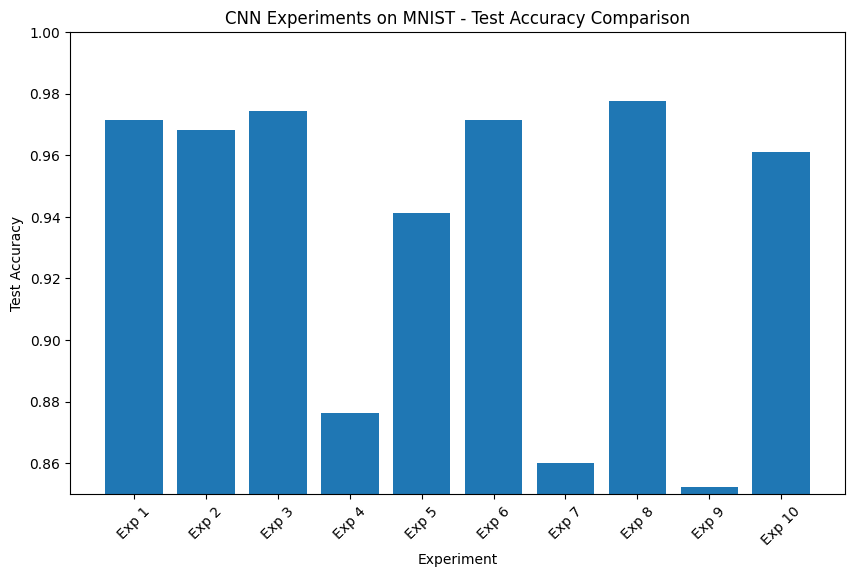

In [ ]:
# Convert results to a DataFrame for a summary report
df_results = pd.DataFrame(results)
print(df_results)

# Create a bar plot to compare test accuracies across experiments
plt.figure(figsize=(10, 6))
plt.bar(df_results['Experiment'], df_results['Test Accuracy'])
plt.xlabel("Experiment")
plt.ylabel("Test Accuracy")
plt.title("CNN Experiments on MNIST - Test Accuracy Comparison")
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()
